In [145]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [146]:
def dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [147]:
def find_majority(y):
    ones = 0
    zeros = 0
    for i in y:
        if(i):
            ones += 1
        else:
            zeros += 1
    return 0 if(zeros > ones) else 1

In [148]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [192]:
K = 50

# Checking KNN for a single instance

In [193]:
# calculate the distance between the test point and all other points in the training set
X_test[7]

array([ 1.00044362, -0.23023387])

In [194]:
y_test[7]

1

In [195]:
dist1 = np.array([dist(X_test[7], x_t) for x_t in X_train])

In [196]:
dist_sorted = dist1.argsort()[:K]

In [197]:
dist_sorted

array([313,  75, 312,  26, 373, 219,  35, 272, 197,  58,  81,   9, 315,
       299,  36,  90, 119, 110, 280, 347,  61, 374, 380, 148, 132, 296,
       109, 290, 372, 255, 116, 342, 174, 375,  56, 392, 355, 294,  91,
       104, 105, 190, 318, 170,   5, 365,  74, 224,  46, 314], dtype=int64)

In [198]:
result = y_train[(dist_sorted)]

In [199]:
find_majority(result)

1

# Running the KNN on X_test

In [190]:
#All the results of KNN will be stored in output array
output = []
for i in X_test:
    dist1 = np.array([dist(i, x_t) for x_t in X_train])
    dist_sorted = dist1.argsort()[:K]
    result = y_train[(dist_sorted)]
    output.append(find_majority(result))
    

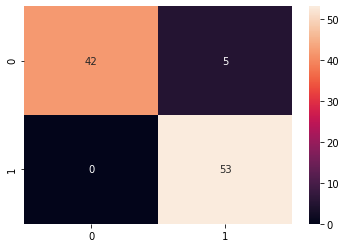

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
ax= plt.subplot()
cm = confusion_matrix(y_test, output)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells